



---

# <center>First Challenge - What Do You See?</center>
---



## For this introduction to data visualizations matplotlib challenge, I chose to use data sets from Kaggle, which can be found [here](https://www.kaggle.com/datasets).

Pay no attention to the import statements behind the curtain.

In [1]:
# I said don't
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import sqlite3
%matplotlib inline

### The first data set is Trending Youtube Video Statistics for US videos, found [here](https://www.kaggle.com/datasnaek/youtube-new).

This first bit of code creates a table that compares the number of likes vs the number of views videos receive. There isn't a lot of useful information to be gleaned from this comparison, but it may be indicating the two are not directly correlated. Some of the videos with the most likes only have half the number of views as some of the most viewed videos, which don't match them on number of likes.

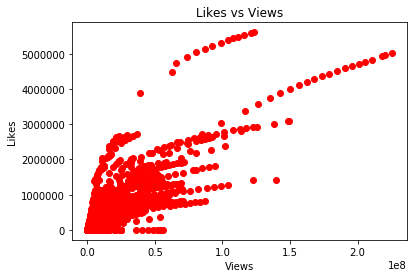

In [2]:
ytdf = pd.read_csv('USvideos.csv')

plt.scatter(
    x=ytdf['views'],
    y=ytdf['likes'],
    color='red'
)

plt.xlabel('Views')
plt.ylabel('Likes')
plt.title('Likes vs Views')
plt.show()

This second block of code was an attempt to visualize the range of dislikes on youtube videos. However, this exercise has instead served to highlight a major number of outliers in this data. Even when the reach of the whiskers is set to 99.9% of the data, you can still see quite a few data points above the line. It may need to be cleaned to get rid of videos that could have been ~~just absolute garbage~~ targets of trolls, so that we can get a better idea of dislike trends. This could also highlight the videos that went viral in a negative way, which could be taken as a subset and studied on its own.

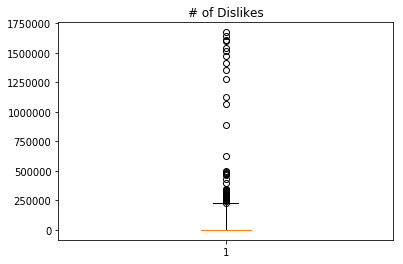

In [3]:
plt.boxplot(ytdf['dislikes'], whis=[0,99.9])
plt.title('# of Dislikes')
plt.show()

### The second data set is from an EEG Micro-Experiment, found [here](https://www.kaggle.com/millerintllc/eeg-microexperiment).

This researcher collected data via a 4-channel EEG system under two conditions. The first set of data was collected while popular music streamed on a custom voice-controlled IoT devices, and the second set was collected while the researcher read scholarly articles about wave signal analysis. EEG tests are used to track and record brainwave activity. Below we can see the activity caused by listening to music in green, and the activity seen when the researcher was reading in purple. This data shows that when looking at the first channel, reading and listening to music seem to create similar activity in the brain. However, as we look at different channels this does not seem to be the case. Thus we can conclude that reading and listening to music does stimulate some of the same parts of the brain, but not all of the same parts.

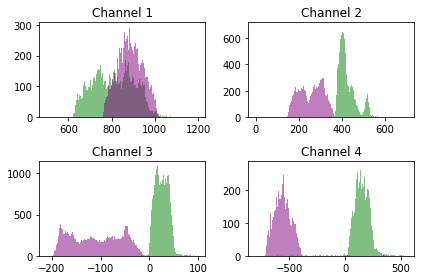

In [4]:
eegdf = pd.read_csv('tiny_eeg_self_experiment_music.csv')
readdf = pd.read_csv('tiny_eeg_self_experiment_reading.csv')

plt.subplot(2,2,1)
plt.hist(eegdf['Channel1'], bins=np.arange(500,1200), color='green', alpha = .5)
plt.hist(readdf['Channel1'], bins=np.arange(500,1200), color='purple', alpha = .5)
plt.title('Channel 1')

plt.subplot(2,2,2)
plt.hist(eegdf['Channel2'], bins=np.arange(0,700), color='green', alpha = .5)
plt.hist(readdf['Channel2'], bins=np.arange(0,700), color='purple', alpha = .5)
plt.title('Channel 2')

plt.subplot(2,2,3)
plt.hist(eegdf['Channel3'], bins=np.arange(-210,100), color='green', alpha = .5)
plt.hist(readdf['Channel3'], bins=np.arange(-210,100), color='purple', alpha = .5)
plt.title('Channel 3')

plt.subplot(2,2,4)
plt.hist(eegdf['Channel4'], bins=np.arange(-800,550), color='green', alpha = .5)
plt.hist(readdf['Channel4'], bins=np.arange(-800,550), color='purple', alpha = .5)
plt.title('Channel 4')

plt.tight_layout()
plt.show()

### Miscellaneous extra mini study

The coding below was just some practice getting used to querying an SQL database using SQLite. I used data that was scraped by Nolan Conaway from the music reviewing platform Pitchfork, found [here](https://www.kaggle.com/nolanbconaway/pitchfork-data/data#database.sqlite). I am hoping to do more work with it in the future.

In [5]:
# Create your connection, returns a connection object
conn = sqlite3.connect('pitchforkdata.sqlite')

# once we have a connection object, create a cursor object (allows us to execute SQL queries against datababse)
cur = conn.cursor()

# once we have a cursor object, use it to execute a query against the database with the execute method
cur.execute('SELECT * FROM artists')

# use the fetchall method to fetch all of the results of the query
df = cur.fetchall()

# view the output
#print(df)

# it is good practice to close connection and cursor objects that are open,
# so that the SQL database can be edited without obstruction
cur.close()
conn.close()